# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 44


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
# Define variables
units = 'imperial'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" +  weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Call function to recalculate maximum temperature to farenheight
       # convert_temp(city_max_temp)
       # city_max_temp = int(max_tempF)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ati
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | yagodnoye
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | gra liyia
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | nesna
Processing Record 9 of Set 1 | likhoy
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | rocha
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | krasnoselkup
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | slobidka
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | bintulu
Processing Record 18 of Set 1 | moctezuma
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | san carlos
Processing Record 21 of Set 1 | asau
Processing Record 22 of Set 1 | ushtobe
Processing Record 23 of Set 1 | silifke
Process

In [4]:
# confirm the request results
city_weather.items()

dict_items([('coord', {'lon': 115.3333, 'lat': -33.65}), ('weather', [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]), ('base', 'stations'), ('main', {'temp': 81.48, 'feels_like': 81.36, 'temp_min': 81.48, 'temp_max': 81.48, 'pressure': 1007, 'humidity': 43, 'sea_level': 1007, 'grnd_level': 1006}), ('visibility', 10000), ('wind', {'speed': 17.65, 'deg': 235, 'gust': 18.66}), ('clouds', {'all': 0}), ('dt', 1675662706), ('sys', {'country': 'AU', 'sunrise': 1675633501, 'sunset': 1675682423}), ('timezone', 28800), ('id', 2075265), ('name', 'Busselton'), ('cod', 200)])

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          42
Lat           42
Lng           42
Max Temp      42
Humidity      42
Cloudiness    42
Wind Speed    42
Country       42
Date          42
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ati,13.2154,18.3353,70.90,17,100,9.37,TD,1675662693
1,east london,-33.0153,27.9116,77.94,78,40,10.36,ZA,1675662693
2,yagodnoye,62.5500,149.6667,-25.78,100,100,2.71,RU,1675662694
3,carnarvon,-24.8667,113.6333,83.71,59,0,19.17,AU,1675662694
4,gra liyia,35.0167,25.6833,44.13,82,26,20.00,GR,1675662694


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.info()
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ati,13.2154,18.3353,70.90,17,100,9.37,TD,1675662693
1,east london,-33.0153,27.9116,77.94,78,40,10.36,ZA,1675662693
2,yagodnoye,62.5500,149.6667,-25.78,100,100,2.71,RU,1675662694
3,carnarvon,-24.8667,113.6333,83.71,59,0,19.17,AU,1675662694
4,gra liyia,35.0167,25.6833,44.13,82,26,20.00,GR,1675662694


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

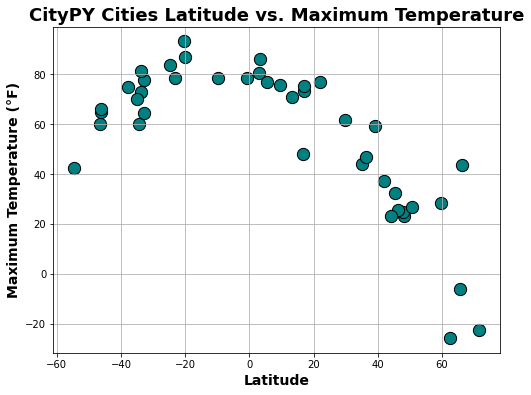

In [9]:
# Build scatter plot for latitude vs. temperature
fig1 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
fig1.set_title('CityPY Cities Latitude vs. Maximum Temperature', fontsize=18, weight='bold')
fig1.set_xlabel('Latitude', fontsize=14, weight='bold')
fig1.set_ylabel('Maximum Temperature (°F)', fontsize=14, weight='bold')
fig1.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

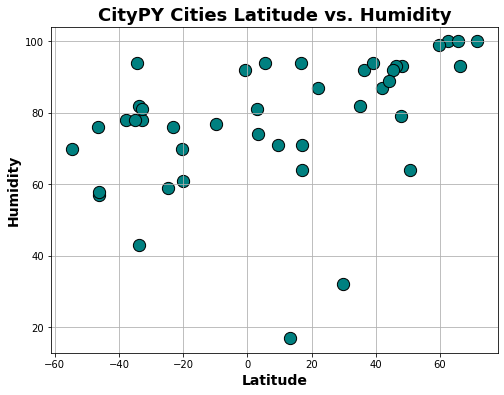

In [10]:
# Build the scatter plots for latitude vs. humidity
fig2 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Humidity',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
fig2.set_title('CityPY Cities Latitude vs. Humidity', fontsize=18, weight='bold')
fig2.set_xlabel('Latitude', fontsize=14, weight='bold')
fig2.set_ylabel('Humidity (%)', fontsize=14, weight='bold')
fig2.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

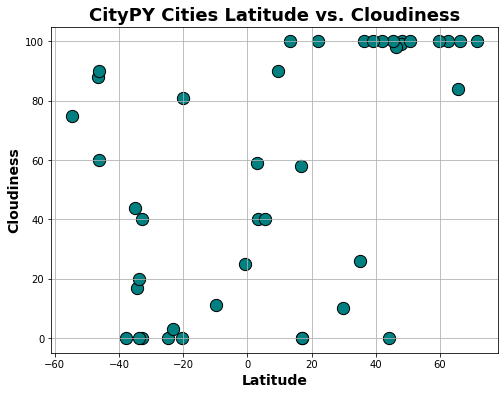

In [11]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Cloudiness',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)
# Incorporate the other graph properties
fig3.set_title('CityPY Cities Latitude vs. Cloudiness', fontsize=18, weight='bold')
fig3.set_xlabel('Latitude', fontsize=14, weight='bold')
fig3.set_ylabel('Cloudiness (%)', fontsize=14, weight='bold')
fig3.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

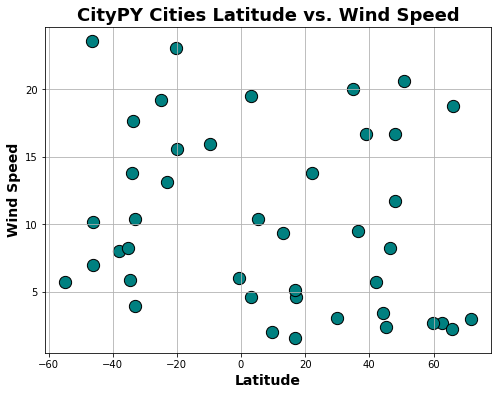

In [12]:
# Build the scatter plots for latitude vs. wind speed
fig4 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Wind Speed',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
fig4.set_title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')
fig4.set_xlabel('Latitude', fontsize=14, weight='bold')
fig4.set_ylabel('Wind Speed (mph)', fontsize=14, weight='bold')
fig4.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation coefficient between Latitude and Maximum Temperature is -0.71
The r-value is: 0.49867210179430055


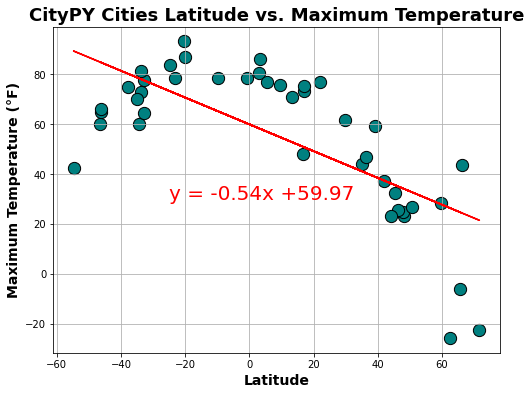

In [43]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig5, ax5 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
print(f"The correlation coefficient between Latitude and Maximum Temperature is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Maximum Temperature (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(-25,30), xytext=(-25,30), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Maximum Temperature', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Maximum Temperature (°F)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig5.png")

# present the data
plt.grid(True)
plt.show()

The correlation coefficient between latitude and Humidity is 0.42
The r-value is: 0.17578840974360088


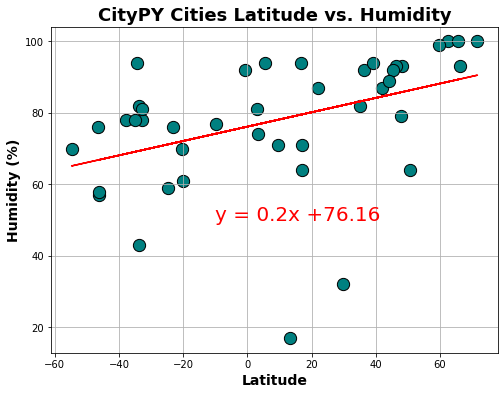

In [35]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig6, ax6 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
print(f"The correlation coefficient between latitude and Humidity is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Humidity (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(-10,50), xytext=(-10,50), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Humidity', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Humidity (%)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig6.png")

# present the data
plt.grid(True)
plt.show()

The correlation coefficient between Latitude and Cloudiness is 0.5
The r-value is: 0.2548841514146357


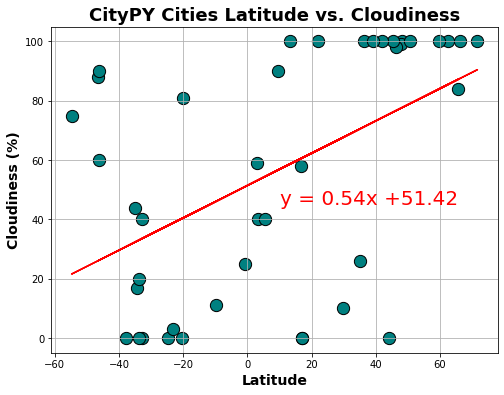

In [36]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig7, ax7 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
print(f"The correlation coefficient between Latitude and Cloudiness is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Cloudiness (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Cloudiness', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Cloudiness (%)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig7.png")

# present the data
plt.grid(True)
plt.show()

The correlation coefficient between Latitude and Wind Speed is -0.21
The r-value is: 0.04387922321922366


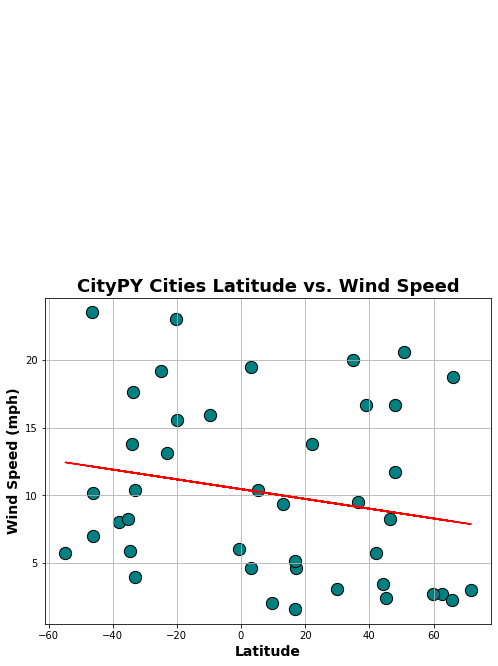

In [44]:
# Define a function to create Linear Regression plots for Latitude vs. each of Maximum Temperature, Humidity, Cloudiness, and Wind Speed
fig8, ax8 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Wind Speed (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# Save the figure
plt.savefig("output_data/Fig8.png")

# present the data
plt.grid(True)
plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ati,13.2154,18.3353,70.90,17,100,9.37,TD,1675662693
2,yagodnoye,62.5500,149.6667,-25.78,100,100,2.71,RU,1675662694
4,gra liyia,35.0167,25.6833,44.13,82,26,20.00,GR,1675662694
5,kapaa,22.0752,-159.3190,76.98,87,100,13.80,US,1675662695
6,nikolskoye,59.7035,30.7861,28.29,99,100,2.73,RU,1675662695


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,77.94,78,40,10.36,ZA,1675662693
3,carnarvon,-24.8667,113.6333,83.71,59,0,19.17,AU,1675662694
10,rocha,-34.4833,-54.3333,59.94,94,17,5.84,UY,1675662696
11,bluff,-46.6000,168.3333,60.28,76,88,23.51,NZ,1675662697
15,puerto ayora,-0.7393,-90.3518,78.55,92,25,5.99,EC,1675662698


###  Temperature vs. Latitude Linear Regression Plot

In [41]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
m = round(slope,2)
b = round(intercept,2)
slope_intercept = f'y = {m}x + {b}'

fig_no = city_data_df.plot(
                        kind='scatter',
                        x=x_value, y=y_value,
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
    )
fig_no.seplt.annotate(slope_intercept, xy=(22, 40), xytext=(15,40.75), fontsize=20,color="red")
fig_no.set_title(plot_title, fontsize=18, weight='bold')
fig_no.set_suptitle(plot_title_sup, fontsize=16, weight='bold')
fig_no.set_xlabel(plot_xlabel, fontsize=14, weight='bold')
fig_no.set_ylabel(plot_ylabel, fontsize=14, weight='bold')
fig_no.grid()

NameError: name 'x_value' is not defined

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [19]:
# Linear regression on Northern Hemisphere

fig9, ax9 = plt.subplots(figsize=(8,6))

x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
print(f"The correlation coefficient between Latitude and Wind Speed is {round(st.pearsonr(x_values, y_values)[0],2)}")

# for latitude (x-values) and Wind Speed (y_values) for the CityPY Cities selected
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

# plot details, add annotation, add chart features
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, xy=(10,45), xytext=(10,45), fontsize=20,color="red")

# set title, labels, and present the data
plt.title('CityPY Cities Latitude vs. Wind Speed', fontsize=18, weight='bold')           
plt.xlabel('Latitude', fontsize=14, weight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=14, weight='bold')

# print r value
print(f'The r-value is: {rvalue**2}')

# present the data
plt.grid(True)
plt.show()
j = 10    # number figure to avoid plotting confusion
x_value = northern_hemi_df.loc[northern_hemi_df['Lat']]
y_value = northern_hemi_df.loc[northern_hemi_df['Max Temp']]
plot_title = 'Temperature vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Maximum Temperature (°F)'
    ## Function to create plot

create_plot(x_value, y_value, j)
    
plt.show()

KeyError: "None of [Float64Index([20.2167, 64.3833, 64.2539, 41.3712, 65.6145, 57.0531, 69.3833,\n              16.5167, 41.3834, 19.7297, 10.5669, 10.6667, 47.6446,  3.0707,\n              69.7008, 72.7868],\n             dtype='float64', name='City_ID')] are in the [index]"

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
plot_title = 'Temperature vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Maximum Temperature (°F)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()
#x_value, y_value, j

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
plot_title = 'Humidity vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
plot_title = 'Humidity vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (oktas)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (oktas)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
plot_title = 'Wind Speed vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (m/s)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (m/s)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE